In [2]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import glob
import mediapipe as mp

In [3]:
mpHands = mp.solutions.hands # Load mediapipe hands module
hands = mpHands.Hands( # Initialize hands model
    max_num_hands=2,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    static_image_mode=False)

def findHands(img):
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Transform to RGB
    results = hands.process(imgRGB) # Feeding image through Hands model
    
    return results # Returning values from model prediction

In [4]:
mpFace = mp.solutions.face_mesh # Load mediapipe face module

faces = mpFace.FaceMesh( # Initialize Face model
    
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    static_image_mode=False)

def findFace(img):
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Transform image to RGB
    results = faces.process(imgRGB) # Feeding image through Face model
    
    return results # Returning values from model prediction

In [9]:
mpDrawHands = mp.solutions.drawing_utils # Initializing drawing object for hands
mpDrawFace = mp.solutions.drawing_utils # Initializing drawing object for Face
mp_drawing_styles =mp.solutions.drawing_styles
mp_drawing_face = mpDrawFace.DrawingSpec(color=(0,0,200),thickness=0,circle_radius=1) #Initializing drawing specifications for face
mp_drawing_hands = mpDrawHands.DrawingSpec(color=(255,0,0),thickness=0,circle_radius=1) #Initializing drawing specifications for hand

def drawLandmarks(img,resultsFace,resultsHands):
    if resultsFace.multi_face_landmarks:
        for face_landmarks in resultsFace.multi_face_landmarks:   
            mpDrawFace.draw_landmarks( # Draw face lendmark
              image=img,
              landmark_list=face_landmarks,
              connections=mpFace.FACEMESH_FACE_OVAL,
                landmark_drawing_spec=mp_drawing_face,
              
              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
              )
            
    if resultsHands.multi_hand_landmarks:
        for handlms in resultsHands.multi_hand_landmarks:   
            mpDrawHands.draw_landmarks(image=img, # Draw hand landmarks
                                       landmark_list=handlms,
                                       connections=mpHands.HAND_CONNECTIONS,
                                      landmark_drawing_spec=mp_drawing_hands)
    return img

In [6]:
cap = cv2.VideoCapture('../ASLens - test data 1/3ddzkmFPEBU-1-rgb_front.mp4')
i=0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output-hands-woman6.mp4',fourcc, 15,(700,720))
use_frame=True
frameovi=[]  
#
while(True):
    ret, frame = cap.read() #reading frames
    if ret: #if frame exist ret=True, otherwise False
        if use_frame: # this means we will skip every other frame
            frame=frame[:, 300:1000,:] #cropping image, retainig all 3 rgb channels
            frameovi.append(frame)
            
            
            resultsFace=findFace(frame) #using function defined above to detect facial landmarks in a frame (findFace)
            resultsHands=findHands(frame) #using function defined above to detect hand landmarks in a frame (findHnds)
    
            
            out.write(drawLandmarks(frame.copy(),resultsFace,resultsHands)) #drawing landmarks on frames by using function defined above (drawLadmarks)
            i+=1

            use_frame=False
        else:
            use_frame=True
    else:
        break
out.release() #close writing stream

In [7]:
LIPS_POSITIONS=[(61,78),(185,191),(40,80),(39,81),(37,82),(0,13),(267,312),(269,311),(270,310),(409,415),(291,308),(375,324),
               (321,318),(405,402),(314,317),(17,14),(84,87),(181,178),(91,88),(146,95)] #lips position pairs

def getCoordinates(landmarks,index,scale,img_size): 
    x=landmarks.landmark[index].x
    y=landmarks.landmark[index].y
    z=landmarks.landmark[index].z
    if scale:
        x=x*img_size[0]
        y=y*img_size[1]
    return x,y,z    
def getLipsLandmarks(resultsFace,scale=False,img_size=(700,720)):
    list_lips_positions=[]
    for cord in LIPS_POSITIONS:
        landmarkovi=resultsFace.multi_face_landmarks[0]
        x1,y1,z1=getCoordinates(landmarkovi,cord[0],scale,img_size)
        x2,y2,z2=getCoordinates(landmarkovi,cord[1],scale,img_size)
        
        avg_x=float((x1+x2)/2)
        avg_y=float((y1+y2)/2)
        
        list_lips_positions.append((avg_x,avg_y,z1))
    return list_lips_positions
 

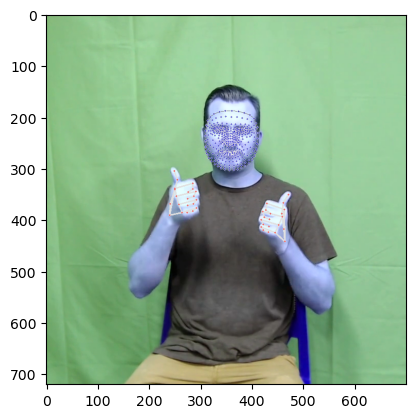

In [11]:
#test for 1 frame
for i in range(0,1):
    img=frameovi[260+i]
    resultsFace=findFace(img)
    resultsHands=findHands(img)
    
    plt.imshow(drawLandmarks(img.copy(),resultsFace,resultsHands))
    plt.show()
  # cv2.imshow("a",imga)
    time.sleep(0.2)

(720, 700, 3)


TypeError: 'int' object is not subscriptable

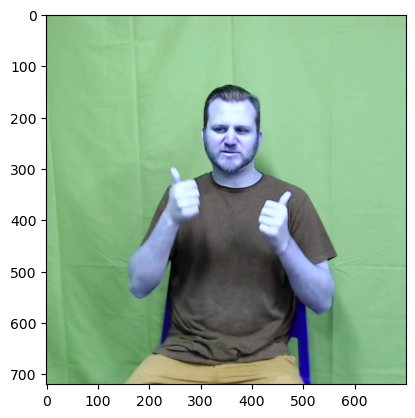

In [16]:
img=frameovi[260]
resultsFace=findFace(img) #using function defined above to detect facial landmarks in a frame (findFace)
#resultsHands=findHands(img) 
print(img.shape)
plt.imshow(img)
landmarkovi=resultsFace.multi_face_landmarks[0]
#fig=plt.figure(figsize=(7,7))

lips=getLipsLandmarks(resultsFace,scale=True)
for i in  oval:
    plt.scatter(i[0],i[1],color="red",s=0.5)
plt.show()

In [109]:
landmarkovi.landmark[i].x*300,landmarkovi.landmark[i].y*200,landmarkovi.landmark[i].z

(165.52430391311646, 81.22453093528748, -0.01029624417424202)

In [111]:
landmarkovi.landmark[i+1].x*300,landmarkovi.landmark[i+1].y*200,landmarkovi.landmark[i+1].z

(177.56059169769287, 81.8043053150177, 0.012142329476773739)

In [17]:
getLipsLandmarks(resultsFace)

[(0.4856315702199936, 0.37253955006599426, 0.007715044543147087),
 (0.4880322217941284, 0.371663436293602, 0.0022902600467205048),
 (0.49205245077610016, 0.3713959902524948, -0.0035244906321167946),
 (0.49713335931301117, 0.37088535726070404, -0.008786583319306374),
 (0.5038687586784363, 0.3709524869918823, -0.012844881974160671),
 (0.5109155476093292, 0.37189435958862305, -0.013657798990607262),
 (0.5180589854717255, 0.37147147953510284, -0.01325894147157669),
 (0.5250287652015686, 0.37192919850349426, -0.009607169777154922),
 (0.5303011238574982, 0.37277503311634064, -0.004705748055130243),
 (0.534524530172348, 0.3734092563390732, 0.0007909612613730133),
 (0.536957710981369, 0.3744981735944748, 0.006174495443701744),
 (0.5332990884780884, 0.3757741302251816, 0.002745359670370817),
 (0.529342383146286, 0.37678666412830353, -0.001868979074060917),
 (0.5238145887851715, 0.3780338317155838, -0.00555593753233552),
 (0.5174044668674469, 0.3789159208536148, -0.008748623542487621),
 (0.51064

In [18]:
mpHands.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [28]:
FACEMESH_FACE_OVAL = [(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)]
oval = {}
for k in FACEMESH_FACE_OVAL:
    oval[k[1]]=k[0]

In [29]:
#oval = set(oval)

In [30]:
oval

{1: 0,
 5: 0,
 17: 13,
 2: 1,
 3: 2,
 4: 3,
 6: 5,
 9: 5,
 7: 6,
 8: 7,
 10: 9,
 13: 9,
 11: 10,
 12: 11,
 14: 13,
 15: 14,
 16: 15,
 18: 17,
 19: 18,
 20: 19}